In [1]:
import dicom_utils as dcm

In [2]:
import os
import pandas as pd
import numpy as np
import shutil
import wget
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)
pd.set_option('display.width', 150)

In [4]:
input_file = "/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/YdataDataset.txt" 
data_path = "/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01"

In [ ]:
%%time
dicom_utils.download_data(input_file, data_path, max_files=100)

In [5]:
%%time
dcm.unzip_data(data_path)

...ignore .DS_Store
CQ500-CT-0.zip
CQ500-CT-1.zip
CQ500-CT-10.zip
CQ500-CT-100.zip
CQ500-CT-101.zip
CQ500-CT-102.zip
CQ500-CT-103.zip
CQ500-CT-104.zip
CQ500-CT-105.zip
CQ500-CT-106.zip
CQ500-CT-107.zip
CQ500-CT-108.zip
CQ500-CT-109.zip
CQ500-CT-11.zip
CQ500-CT-110.zip
CQ500-CT-111.zip
CQ500-CT-112.zip
CQ500-CT-113.zip
CQ500-CT-114.zip
CQ500-CT-115.zip
CQ500-CT-116.zip
CQ500-CT-117.zip
CQ500-CT-118.zip
CQ500-CT-119.zip
CQ500-CT-12.zip
CQ500-CT-120.zip
Skipping CQ500-CT-120.zip with exception: File is not a zip file
CQ500-CT-121.zip
CQ500-CT-122.zip
CQ500-CT-123.zip
CQ500-CT-124.zip
CQ500-CT-125.zip
CQ500-CT-126.zip
CQ500-CT-127.zip
CQ500-CT-128.zip
CQ500-CT-129.zip
CQ500-CT-13.zip
CQ500-CT-130.zip
CQ500-CT-131.zip
CQ500-CT-132.zip
CQ500-CT-133.zip
CQ500-CT-134.zip
CQ500-CT-135.zip
CQ500-CT-136.zip
CQ500-CT-137.zip
CQ500-CT-138.zip
CQ500-CT-139.zip
CQ500-CT-14.zip
CQ500-CT-140.zip
CQ500-CT-141.zip
CQ500-CT-142.zip
CQ500-CT-143.zip
CQ500-CT-144.zip
CQ500-CT-145.zip
CQ500-CT-146.zip
CQ500-

In [6]:
%%time
# extract metadata
df = dcm.extract_scans_info(data_path)
print(f"Overall images: {len(df)}")
# filter
df = dcm.filter_data_fields(df)
print(f"...After size filtering: {len(df)}")
# remove upside down images that fail on resampling
df = df[~((df['SliceThickness'] * df['num_slices'] > 250) & (df['ScanOptions'] == 'HELICAL'))]
print(f"...After special case filtering: {len(df)}")
dcm.save_3d_images(df, data_path)

/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT132 CQ500CT132/Unknown Study/CT PRE CONTRAST 5MM STD/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT132 CQ500CT132/Unknown Study/CT PRE CONTRAST THIN/CT000065.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT132 CQ500CT132/Unknown Study/CT PRE CONTRAST BONE/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT163 CQ500CT163/Unknown Study/CT Thin Plain/CT000000.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT101 CQ500CT101/Unknown Study/CT POST CONTRAST/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT101 CQ500CT101/Unknown Study/CT POST CONTRAST-2/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT10

/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN/CT000065.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT102 CQ500CT102/Unknown Study/CT Plain/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT18 CQ500CT18/Unknown Study/CT 0.625mm/CT000065.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT18 CQ500CT18/Unknown Study/CT 5mm/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT157 CQ500CT157/Unknown Study/CT Plain 3mm/CT000048.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT106 CQ500CT106/Unknown Study/CT Thin Bone/CT000000.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT106 CQ500CT106/Unknown Study/CT 55mm Plain/CT000006.dcm

/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN/CT000267.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT107 CQ500CT107/Unknown Study/CT 55mm Plain-2/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT107 CQ500CT107/Unknown Study/CT 55mm Plain/CT000006.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT107 CQ500CT107/Unknown Study/CT Thin Plain-2/CT000065.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT107 CQ500CT107/Unknown Study/CT Thin Plain/CT000065.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT156 CQ500CT156/Unknown Study/CT PLAIN THIN/CT000065.dcm
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT156 CQ500CT156/Unknown Study/C

file count: 251
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN
file count: 224
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT150 CQ500CT150/Unknown Study/CT Thin Contrast
file count: 256
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT150 CQ500CT150/Unknown Study/CT Thin Plain
file count: 256
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT105 CQ500CT105/Unknown Study/CT I To S
file count: 232
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT105 CQ500CT105/Unknown Study/CT PRE CONTRAST THIN
file count: 224
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Docum

file count: 251
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT135 CQ500CT135/Unknown Study/CT 4cc sec 150cc D3D on-2
file count: 251
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT135 CQ500CT135/Unknown Study/CT PLAIN THIN
file count: 224
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT175 CQ500CT175/Unknown Study/CT PRE CONTRAST THIN
file count: 223
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT124 CQ500CT124/Unknown Study/CT PRE CONTRAST THIN
file count: 226
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT124 CQ500CT124/Unknown Study/CT 5mm POST CONTRAST
file count: 232
skipped, no SliceLocation: 0
gl

file count: 233
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT130 CQ500CT130/Unknown Study/CT BONE
file count: 256
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT130 CQ500CT130/Unknown Study/CT PLAIN THIN
file count: 256
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT11 CQ500CT11/Unknown Study/CT Thin Plain
file count: 256
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain
file count: 256
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500CT152 CQ500CT152/Unknown Study/CT PLAIN THIN
file count: 240
skipped, no SliceLocation: 0
glob: /Users/boriskefer/Documents/coding/YD

In [5]:
dcm.clean_up(data_path)

In [7]:
%%time
dcm.transform_to_hu_dir(data_path)

/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-183_156.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-102_94.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-155_162.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-159_144.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-183_155.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-168_71.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-137_177.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-183_154.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-109_49.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydat

/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-166_172.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-135_118.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-126_77.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-104_164.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-164_115.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-127_235.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-106_101.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-117_138.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03/CQ500-CT-104_165.npz
/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/yd

In [6]:
%%time
# more filtering!
df = pd.read_csv(os.path.join(data_path, "data_fields.csv"), index_col=[0])
for f in os.listdir(data_path):
    if not f.startswith("CQ") or not f.endswith(".npz"):
        continue
    path = os.path.join(data_path, f)
    image = np.load(path)['I']
    print(f"{f}   {image.shape}")
    df.loc[int(f.split('.')[0].split('_')[-1]), 'last_slice_mean'] = image[:,:,-1].mean()
# this will filter out "upside down" images
df = df[df['last_slice_mean'] < -800]
dcm.remove_bad_npz(df, data_path)
df.to_csv(os.path.join(data_path, "data_fields.csv"))

CQ500-CT-183_156.npz   (512, 512, 352)
CQ500-CT-102_94.npz   (512, 512, 240)
CQ500-CT-155_162.npz   (512, 512, 256)
CQ500-CT-159_144.npz   (512, 512, 256)
CQ500-CT-183_155.npz   (512, 512, 176)
CQ500-CT-168_71.npz   (512, 512, 166)
CQ500-CT-137_177.npz   (512, 512, 244)
CQ500-CT-183_154.npz   (512, 512, 176)
CQ500-CT-109_49.npz   (512, 512, 256)
CQ500-CT-10_134.npz   (512, 512, 224)
CQ500-CT-159_141.npz   (512, 512, 256)
CQ500-CT-180_252.npz   (512, 512, 288)
CQ500-CT-135_117.npz   (512, 512, 251)
CQ500-CT-167_24.npz   (512, 512, 288)
CQ500-CT-126_78.npz   (512, 512, 240)
CQ500-CT-149_197.npz   (512, 512, 256)
CQ500-CT-150_8.npz   (512, 512, 256)
CQ500-CT-154_16.npz   (512, 512, 256)
CQ500-CT-117_136.npz   (512, 512, 233)
CQ500-CT-183_152.npz   (512, 512, 352)
CQ500-CT-175_122.npz   (512, 512, 223)
CQ500-CT-187_129.npz   (512, 512, 256)
CQ500-CT-105_14.npz   (512, 512, 224)
CQ500-CT-138_232.npz   (512, 512, 246)
CQ500-CT-11_223.npz   (512, 512, 256)
CQ500-CT-107_193.npz   (512, 512, 25

In [7]:
%%time
dcm.clean_noise_dir(data_path)

clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_156.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-102_94.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-155_162.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-159_144.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_155.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-137_177.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_154.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-109_49.npz
clean_noise /Users/boriskefer/Documents/coding/YDA

clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-162_184.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-126_76.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-135_119.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-140_52.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-166_172.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-135_118.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-126_77.npz
clean_noise /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-104_164.npz
clean_noise /Users/boriskefer/Documents/coding/YDAT

In [8]:
%%time
new_pixel_spacing = dcm.calculate_new_pixel_size(df, desired_arr_shape=(320, 320, 20))
print(new_pixel_spacing)
dcm.resample_dir(data_path, pixel_spacing_mm=new_pixel_spacing)

(0.747353, 0.747353, 8.039541)
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_156.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-102_94.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-155_162.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-159_144.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_155.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-137_177.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_154.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-109_49.npz
resample /Users/boriskefer/Documents/coding

resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-126_76.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-135_119.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-140_52.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-166_172.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-135_118.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-126_77.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-104_164.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-164_115.npz
resample /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/yda

In [9]:
%%time
dcm.adjust_size_dir(data_path, new_shape=(320, 320, 20))

adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_156.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-102_94.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-155_162.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-159_144.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_155.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-137_177.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-183_154.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-109_49.npz
adjust_size /Users/boriskefer/Documents/coding/YDA

adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-135_119.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-140_52.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-166_172.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-135_118.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-126_77.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-104_164.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-164_115.npz
adjust_size /Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01/CQ500-CT-127_235.npz
adjust_size /Users/boriskefer/Documents/coding/YDA

In [ ]:
# # some code examples to filter images after preprocessing

# # remove upside down images that fail on resampling
# df = df[~((df['h'] > 250) & (df['ScanOptions'] == 'HELICAL'))]
# dicom_utils.remove_bad_npz(df, data_path)
# df.to_csv(os.path.join(data_path, "data_fields.csv"))

# # this is recovery from previous fail... don't need this usually
# df = pd.read_csv(os.path.join(data_path, "data_fields.csv"), index_col=[0])
# print(len(df))
# df = dicom_utils.filter_data_fields(df)
# print(len(df))
# dicom_utils.remove_bad_npz(df, data_path)

In [5]:
df = pd.read_csv(os.path.join(data_path, "data_fields.csv"), index_col=[0])
len(df)

98

In [8]:
for f in os.listdir(data_path):
    if not f.startswith("CQ") or not f.endswith(".npz"):
        continue
    path = os.path.join(data_path, f)
    image = np.load(path)['I']
    print(f"{f}   {image.shape}")
    df.loc[int(f.split('.')[0].split('_')[-1]), 'arr_shape'] = str(image.shape)

CQ500-CT-183_156.npz   (320, 320, 20)
CQ500-CT-102_94.npz   (320, 320, 20)
CQ500-CT-155_162.npz   (320, 320, 20)
CQ500-CT-159_144.npz   (320, 320, 20)
CQ500-CT-183_155.npz   (320, 320, 20)
CQ500-CT-137_177.npz   (320, 320, 20)
CQ500-CT-183_154.npz   (320, 320, 20)
CQ500-CT-109_49.npz   (320, 320, 20)
CQ500-CT-10_134.npz   (320, 320, 20)
CQ500-CT-159_141.npz   (320, 320, 20)
CQ500-CT-180_252.npz   (320, 320, 20)
CQ500-CT-135_117.npz   (320, 320, 20)
CQ500-CT-167_24.npz   (320, 320, 20)
CQ500-CT-126_78.npz   (320, 320, 20)
CQ500-CT-149_197.npz   (320, 320, 20)
CQ500-CT-150_8.npz   (320, 320, 20)
CQ500-CT-154_16.npz   (320, 320, 20)
CQ500-CT-117_136.npz   (320, 320, 20)
CQ500-CT-183_152.npz   (320, 320, 20)
CQ500-CT-175_122.npz   (320, 320, 20)
CQ500-CT-187_129.npz   (320, 320, 20)
CQ500-CT-105_14.npz   (320, 320, 20)
CQ500-CT-138_232.npz   (320, 320, 20)
CQ500-CT-11_223.npz   (320, 320, 20)
CQ500-CT-107_193.npz   (320, 320, 20)
CQ500-CT-148_108.npz   (320, 320, 20)
CQ500-CT-186_41.npz   

In [7]:
interesting_fields = [
    "PatientName", 
    "PixelSpacing", 
    "SliceThickness", 
    "SpacingBetweenSlices", 
    "num_slices", 
    "orig_shape", 
    #"h",
    'ImageType', 'ScanOptions', 'last_slice_mean'
]
df[interesting_fields]

,PatientName,PixelSpacing,SliceThickness,SpacingBetweenSlices,num_slices,orig_shape,ImageType,ScanOptions,last_slice_mean
1,CQ500-CT-132,"[0.468750, 0.468750]",0.625,0.625,251,"(512, 512, 251)","['ORIGINAL', 'PRIMARY', 'AXIAL']",HELICAL MODE,-917.389442
6,CQ500-CT-101,"[0.431641, 0.431641]",0.625,10.030,224,"(512, 512, 224)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-940.072639
8,CQ500-CT-150,"[0.478516, 0.478516]",0.625,20.000,256,"(512, 512, 256)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-917.074608
10,CQ500-CT-150,"[0.478516, 0.478516]",0.625,20.000,256,"(512, 512, 256)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-937.940804
12,CQ500-CT-105,"[0.398438, 0.398438]",0.625,0.625,232,"(512, 512, 232)","['ORIGINAL', 'PRIMARY', 'AXIAL']",HELICAL MODE,-956.747025
14,CQ500-CT-105,"[0.392578, 0.392578]",0.625,0.625,224,"(512, 512, 224)","['ORIGINAL', 'PRIMARY', 'AXIAL']",HELICAL MODE,-973.920261
16,CQ500-CT-154,"[0.441406, 0.441406]",0.625,10.185,256,"(512, 512, 256)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-939.625896
18,CQ500-CT-178,"[0.488281, 0.488281]",0.625,10.000,208,"(512, 512, 208)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-874.378819
21,CQ500-CT-129,"[0.507812, 0.507812]",0.625,20.000,288,"(512, 512, 288)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-965.374428
24,CQ500-CT-167,"[0.515625, 0.515625]",0.625,20.222,288,"(512, 512, 288)","['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-965.413330


In [11]:
df['h'] = df['SliceThickness'] * df['num_slices']

In [12]:
interesting_fields = [
    "PatientName", 
    "PixelSpacing", 
    "SliceThickness", 
    "SpacingBetweenSlices", 
    "num_slices", 
    "orig_shape", 
    "h",
    'ImageType', 'ScanOptions', 'last_slice_mean'
]
df[interesting_fields][df['h'] > 180]

,PatientName,PixelSpacing,SliceThickness,SpacingBetweenSlices,num_slices,orig_shape,h,ImageType,ScanOptions,last_slice_mean
152,CQ500-CT-183,"[0.488281, 0.488281]",0.625,10.0,352,"(512, 512, 352)",220.0,"['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-964.332016
154,CQ500-CT-183,"[0.488281, 0.488281]",1.250,10.0,176,"(512, 512, 176)",220.0,"['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-964.329361
155,CQ500-CT-183,"[0.488281, 0.488281]",1.250,10.0,176,"(512, 512, 176)",220.0,"['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-964.557655
156,CQ500-CT-183,"[0.488281, 0.488281]",0.625,10.0,352,"(512, 512, 352)",220.0,"['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-963.929897
235,CQ500-CT-127,"[0.472656, 0.472656]",0.625,20.0,352,"(512, 512, 352)",220.0,"['ORIGINAL', 'PRIMARY', 'AXIAL']",AXIAL MODE,-954.659302


In [13]:
df[interesting_fields][df['ScanOptions'] == 'HELICAL']

,PatientName,PixelSpacing,SliceThickness,SpacingBetweenSlices,num_slices,orig_shape,h,ImageType,ScanOptions,last_slice_mean


<AxesSubplot:>

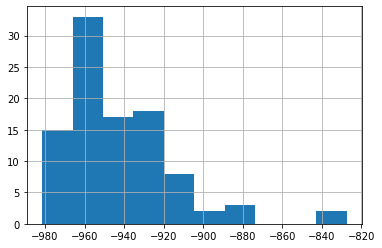

In [14]:
df['last_slice_mean'].hist()

In [15]:
df[interesting_fields][df['last_slice_mean'] > -800]

,PatientName,PixelSpacing,SliceThickness,SpacingBetweenSlices,num_slices,orig_shape,h,ImageType,ScanOptions,last_slice_mean


In [ ]:
#grand recovery!
# this was done to clean a big mess
df = pd.read_csv(os.path.join(data_path, "data_fields.csv"), index_col=[0])
df1 = pd.read_csv(os.path.join(data_path1, "data_fields.csv"), index_col=[0])
idx = df1.index.max()
for f in os.listdir(data_path):
    if not f.startswith("CQ") or not f.endswith(".npz"):
        continue
    idx += 1
    data_fields = dicom_utils.get_data_fields(f, df)
    data_fields.name = idx
    df1 = df1.append(data_fields, verify_integrity=True)
    new_file_name = f"{data_fields['PatientID']}_{idx}.npz"
    os.rename(os.path.join(data_path, f), os.path.join(data_path1, new_file_name))
df1.to_csv(os.path.join(data_path1, "data_fields.csv"))